# 1. Population Genetics Simulation

Create a program that simulates the allelic frequency in a finite diploid population for a certain number of generations.

The program takes as input the initial allele frequencies, the fitness of each genotype, the population size, and the number of generations. Because these simulations are stochastic each run of the simulation will give a different result, to allow an idea of the behavior of the allelic frequencies, your program should repeat the simulations many times for each parameter set and plot all the results in a single graph. The number of simulations should also be determined by the user. You can start your program using the variable definitions in the cell below.

Your program should output two graphs. The first should show the allele frequency at each generation, and the other should be a histogram with the final values of the allele frequency. Something like this:

![simulation](Sim1.png)

![histogram](Sim2.png)

Last year a student used this homework as the starting point for her project to create a population genetics simulator for BIOL040. You can see the final project here: http://dna.pomona.edu:5006/pop_gen_sim

In [58]:
#Packages
from numpy import random as rd
from plotly.graph_objs import *

#Allele frequencies
initA = 0.50
inita = 0.50

#Fitnesses
fAA = 1
fAa = 1
faa = 1

#Pop Size
pop = 1000

#Number of generations
gen = 100

#Number of simulations
sim = 100

# creating list to store A allele frequencies. Will be a list of lists
freqA_list_sim = []


for _ in range(sim): 
    
    freqA_list = [initA] 
    
    for _ in range(gen):
        last_gen_freqA = freqA_list[-1] #last generation's frequency of A
        last_gen_freqa = 1 - last_gen_freqA #last generation's frequency of a
        
        M = fAA*freqAA + fAa*freqAa + faa*freqaa # used to standardize the frequencies later

        #calculate the frequency of A in the current generation, accounting for finite population size
        freqA = (rd.binomial(pop, (fAA*last_gen_freqA**2)/M) + (0.5)*rd.binomial(pop, (2*last_gen_freqA*last_gen_freqa)/M))/pop

        # threshold to 1 in case the freqA calculated above is larger than 1
       # if freqA > 1:
       #     freqA = 1
        
        freqA_list.append(freqA) # appending current frequency of A to freqA_list
    
    freqA_list_sim.append(freqA_list) # appending entire list with every generation of A frequency to the overall freqA_list_sim


ValueError: p < 0, p > 1 or p is NaN

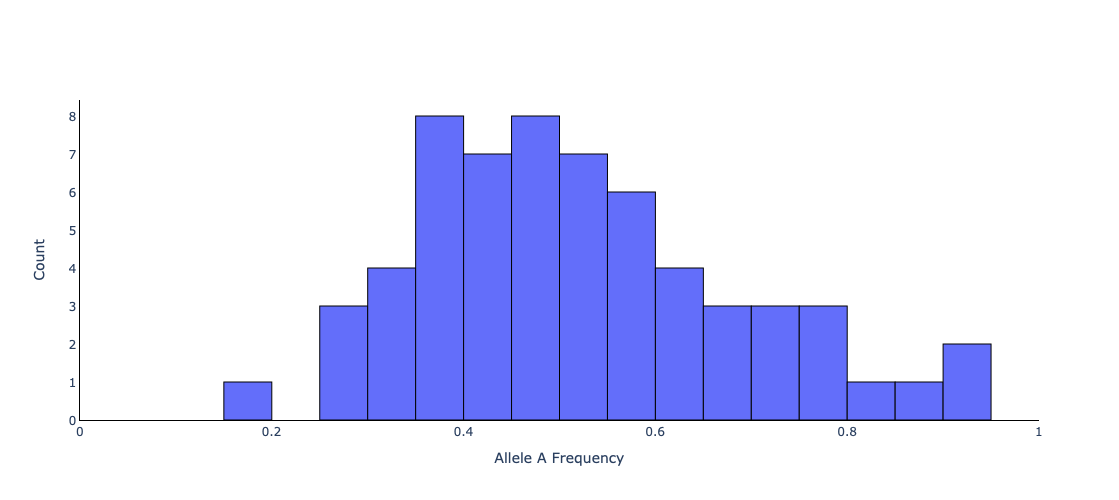

In [59]:
#histogram of the final allele frequencies
from plotly.graph_objs import *

lastgen_freqA = []
for sim in freqA_list_sim:
    lastgen_freqA.append(sim[-1])

fig = Figure(data=[Histogram(x=lastgen_freqA, nbinsx=15)])
fig.update_traces(marker_line_width=1,marker_line_color="black")
fig.update_layout(plot_bgcolor = 'white',
                  xaxis_range=[0,1],
                  xaxis_title='Allele A Frequency',
                  yaxis_title='Count',
                  width=700,  # Width in pixels
                  height=500)  # Height in pixels
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1)
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 1)
fig.show()

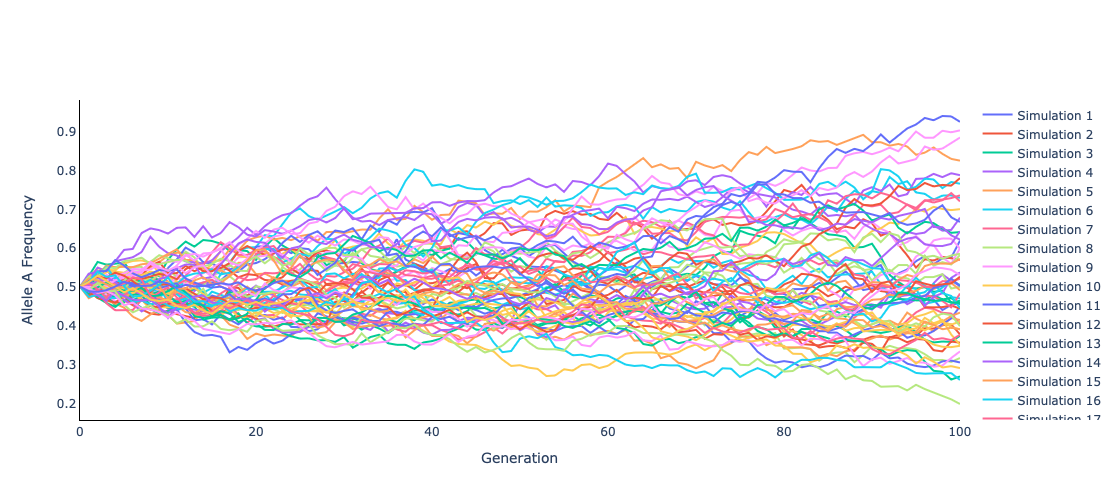

In [60]:
# line plot
from plotly.graph_objs import *


simulations = []
for index, value in enumerate(freqA_list_sim):
    legend_title = f"Simulation {index + 1}"
    simulation = Scatter(x=list(range(len(value))), y=value, mode='lines', name=legend_title)
    simulations.append(simulation)

fig = Figure(data=simulations)
fig.update_layout(
    plot_bgcolor = 'white',
    xaxis_title='Generation',
    yaxis_title='Allele A Frequency',
    width=900,  # Width in pixels
    height=500  # Height in pixels
)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1)
fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 1)
fig.show()